In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Starting GPU**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.6947477120002077
GPU (s):
0.03964940199989542
GPU speedup over CPU: 67x


In [1]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

sh = train_images.shape
sh

NameError: ignored

In [ ]:
def simple_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  return model

In [ ]:
def Plotter(acc,val_acc,loss,val_loss,l_r):
  
  plt.plot(acc, label='accuracy')
  plt.plot(val_acc, label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()


  plt.plot(loss, label='loss')
  plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(loc='lower right')
  plt.show()

  plt.plot(l_r, label='Learning Rate')
  # plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('LR')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
model = simple_model()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Normal default fit** : LR and Batch Size default

In [ ]:
history = model.fit(train_images, train_labels, epochs=180, 
                    validation_data=(test_images, test_labels))

In [ ]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']

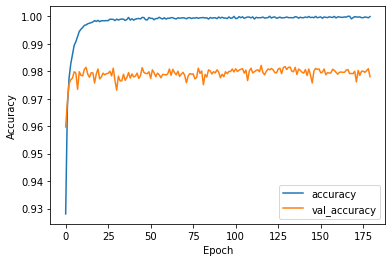

313/313 - 0s - loss: 0.3622 - accuracy: 0.9780


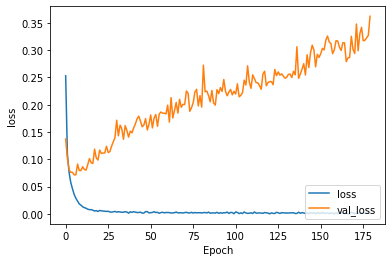

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**Test for LR**

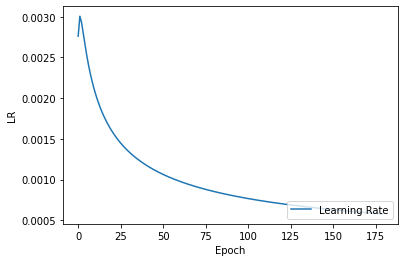

In [ ]:
lr = []
epoo=180
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  # print(z,(batch_size)/((z+1)**(3/2))/80)

  LR = (batch_size)/((z+1)**(3/2)*80)
  LR=LR/8
  lr.append(LR)

plt.plot(lr, label='Learning Rate')
# plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])

In [ ]:
acc_2 = acc
val_acc_2 = val_acc

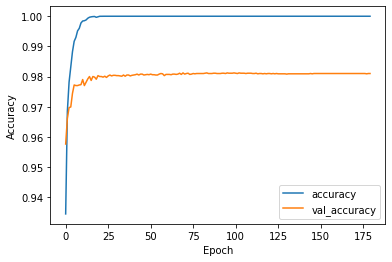

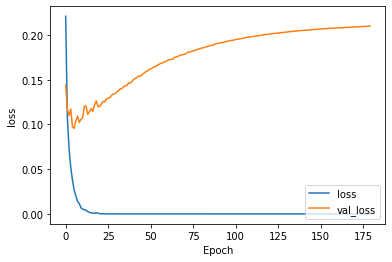

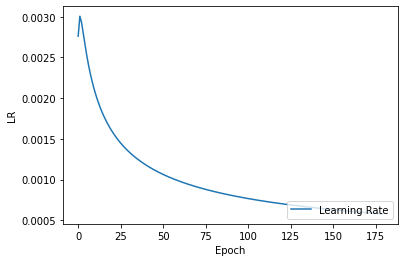

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Keeping batch size constant**

In [ ]:
model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            # batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8968 - val_loss: 0.1219 - val_accuracy: 0.9618


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9705 - val_loss: 0.0901 - val_accuracy: 0.9707


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.1006 - val_accuracy: 0.9706


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
1875/1875 [===================

In [ ]:
acc_3 = acc
val_acc_3 = val_acc

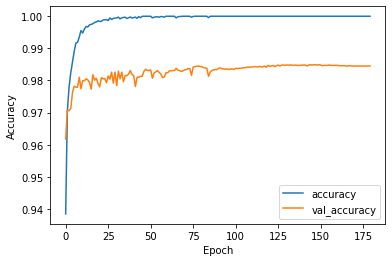

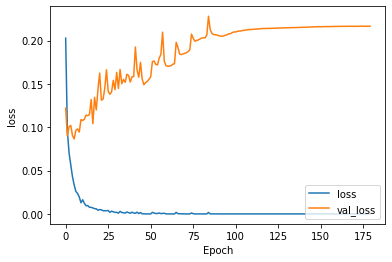

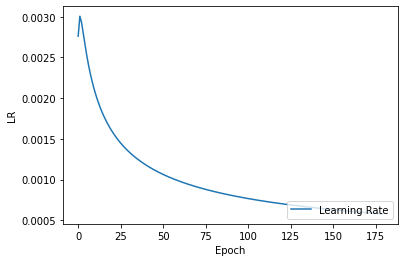

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**LR constant**

In [ ]:
model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            # callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 
12000/12000 [==============================] - 21s 2ms/step - loss: 0.3318 - accuracy: 0.9015 - val_loss: 0.1243 - val_accuracy: 0.9632


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0804 - accuracy: 0.9757 - val_loss: 0.0863 - val_accuracy: 0.9726


epoch 3, Learning Rate 0.0029296875, Batch Size  15 
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0708 - val_accuracy: 0.9795


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0681 - val_accuracy: 0.9790


epoch 5, Learning Rate 0.0026578664743741078, Batch Size  25 
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0737 - val_accuracy: 0.9782


epoch 6, Learning Rat

In [ ]:
acc_4 = acc
val_acc_4 = val_acc

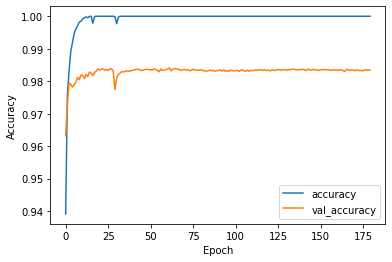

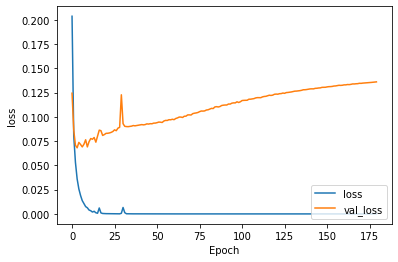

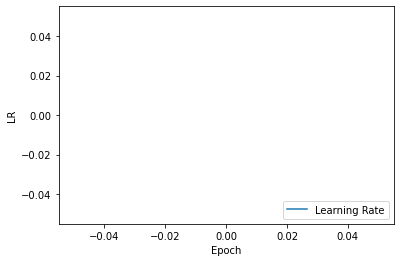

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Plotting all of them**

---

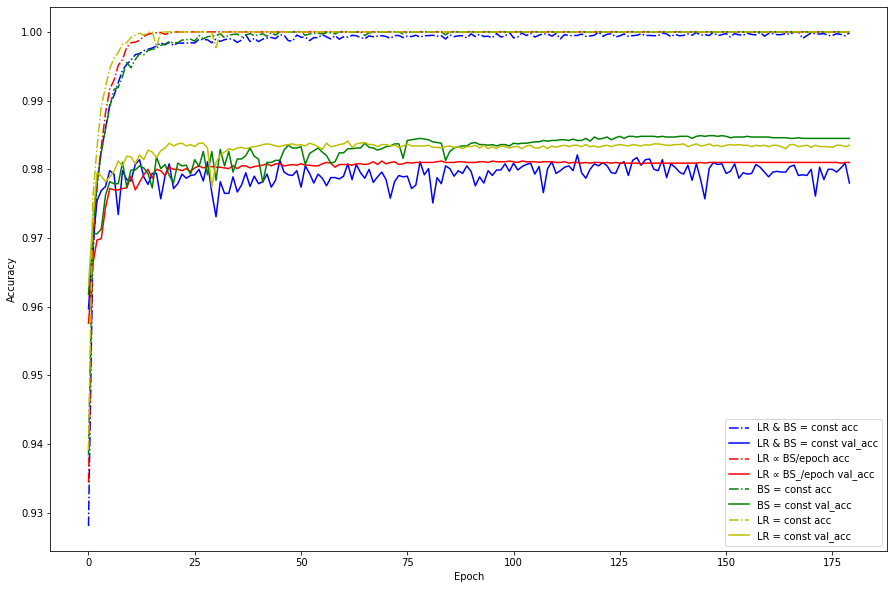

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1, label='LR & BS = const acc',ls='-.',c='b')
plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2, label='LR ∝ BS/epoch acc',ls='-.',c='r')
plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3, label='BS = const acc',ls='-.',c='g')
plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4, label='LR = const acc',ls='-.',c='y')
plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
acc_1_dif = []
for i in range(len(acc_1)): acc_1_dif.append(acc_1[i] - val_acc_1[i]) 
acc_2_dif = []
for i in range(len(acc_2)): acc_2_dif.append(acc_2[i][0] - val_acc_2[i][0]) 
acc_3_dif = []
for i in range(len(acc_3)): acc_3_dif.append(acc_3[i][0] - val_acc_3[i][0]) 
acc_4_dif = []
for i in range(len(acc_4)): acc_4_dif.append(acc_4[i][0] - val_acc_4[i][0]) 

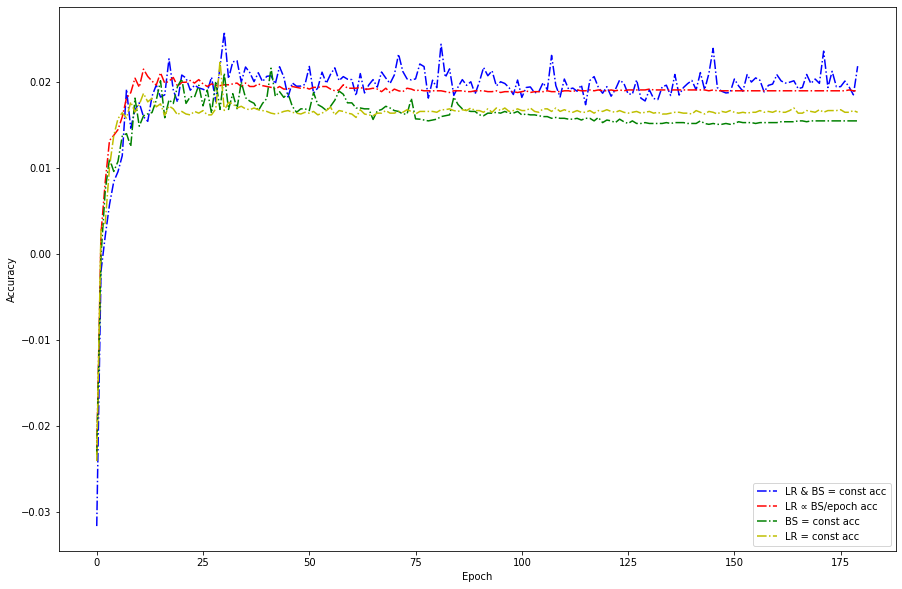

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1_dif, label='LR & BS = const acc',ls='-.',c='b')
# plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2_dif, label='LR ∝ BS/epoch acc',ls='-.',c='r')
# plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3_dif, label='BS = const acc',ls='-.',c='g')
# plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4_dif, label='LR = const acc',ls='-.',c='y')
# plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()